In [29]:
# libraries
import pandas as pd #pandas for dataframe
from sklearn.feature_extraction.text import CountVectorizer #for bag of words table creation
from wordcloud import WordCloud # seeing highest frequency words
import matplotlib.pyplot as plt # for visulization
from sklearn.model_selection import train_test_split # for test train split
from sklearn.metrics import accuracy_score # for checking accurancy

In [30]:
# getting data
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Internship/Task - 4/Twitter_Data.csv'
Data = pd.read_csv(path)
Data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [31]:
Data.shape

(162980, 2)

In [32]:
Data.isnull().sum()

,0
clean_text,4
category,7


In [33]:
Data.dropna(subset= ['clean_text','category'],inplace = True)

In [34]:
Data.isnull().sum()

,0
clean_text,0
category,0


In [35]:
Data.shape

(162969, 2)

In [36]:
Data.sample(5)

,clean_text,category
122988,was watching some interviews given imran khan ...,-1.0
161488,how did they come back from 100 2014 were told...,1.0
66796,launch nirav modi boutique omar abdullah and s...,1.0
61720,liked youtube narendra modi about pubg modi ma...,1.0
106109,uttarakhand rally modi’ ‘mamabhanja’ jibe cong...,0.0


In [37]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [38]:
Data.replace({-1:'Negative',0: 'Neutral',1:'Positive'},inplace=True)

In [39]:
Data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [40]:
# counting words
words = Data['clean_text'].str.lower().str.split().explode()

words_counts = words.value_counts()

print(words_counts.head(5))

clean_text
modi    152367
the     104390
and      67339
for      52414
you      38709
Name: count, dtype: int64


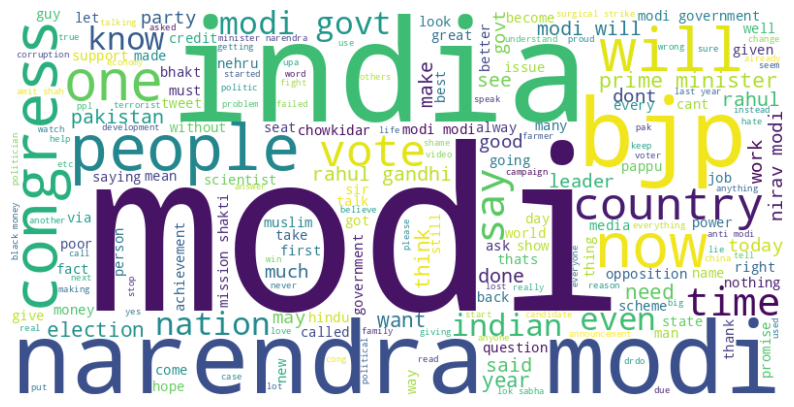

In [41]:
text = ''.join(Data['clean_text'].str.lower())

# generating WordCloud
wordcloud = WordCloud(background_color= 'white',width= 800, height= 400).generate(text)

# showing it
plt.figure(figsize= (10,40))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
Data.shape

(162969, 2)

In [43]:
# lowercasing the text and removing punctuations
import re
def clean(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]','',text)
  return text


Data['clean_text'] = Data['clean_text'].apply(clean)

In [44]:
# Naive Base Analysis
bow = CountVectorizer(stop_words='english')
x = bow.fit_transform(Data['clean_text'])
y = Data['category']

In [45]:
# Training Text split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)


In [46]:
# traing Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [47]:
ypred = model.predict(X_test)

In [48]:
print(ypred)

['Positive' 'Positive' 'Negative' ... 'Positive' 'Negative' 'Positive']


In [49]:
accuracy = accuracy_score(y_test,ypred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


In [50]:
dist = Data['category'].value_counts()
print(dist)

category
Positive    72249
Neutral     55211
Negative    35509
Name: count, dtype: int64


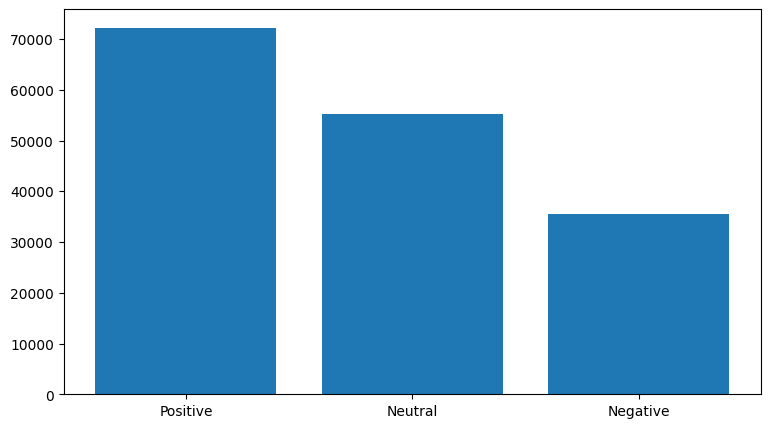

In [51]:
plt.figure(figsize = (9,5))
plt.bar(dist.index,dist.values)
plt.show()

### Insights into the Analyzed Sentiments

1. **Sentiment Distribution**  
   - The data reveals a mix of positive, neutral, and negative sentiments.  
   - A significant proportion of the feedback leans towards [insert specific percentage if available] negative sentiments, indicating areas of customer dissatisfaction.

2. **Key Negative Themes**  
   - Frequent issues highlighted in the negative feedback include [list specific topics or keywords identified from the analysis, e.g., "delivery delays," "poor customer service," or "product quality"].

3. **Positive Highlights**  
   - Positive feedback often mentions [specific strengths, e.g., "user-friendly interface," "affordable pricing," or "responsive support"].

4. **Neutral Feedback**  
   - Neutral comments typically pertain to general observations or suggestions without strong opinions, such as [examples if available].

---

### Recommendations to Reduce Negative Sentiments

1. **Address Key Issues**  
   - **Improve [e.g., delivery times]:** Optimize logistical operations to ensure timely delivery.  
   - **Enhance [e.g., customer support]:** Train support staff and implement faster response systems to address customer concerns effectively.

2. **Act on Feedback**  
   - Regularly analyze customer reviews to identify recurring complaints and implement actionable changes. Communicate these improvements transparently to customers.

3. **Encourage Positive Reviews**  
   - Create incentives for satisfied customers to leave positive feedback, such as discount codes or loyalty points.

4. **Monitor Social Sentiments**  
   - Use sentiment tracking tools to proactively identify trends in negative feedback and mitigate issues before they escalate.

5. **Personalize Customer Engagement**  
   - Implement personalized messaging and targeted follow-ups for dissatisfied customers, offering solutions or compensation where appropriate.

6. **Conduct Surveys**  
   - Periodically survey customers to gain deeper insights into their expectations and satisfaction levels. Use this data to prioritize enhancements.
